In [35]:
import random
import pandas as pd
import matplotlib.pyplot as plt

In [36]:
def one_run() -> None:
    n = 20 #population size
    t = 100 #max run time

    p = 0.4 #chance of conversion per day
    k = 8   #days until bored

    Status = ['adop'] + (n-1)*['unadop']
    Time = [1] + (n-1)*[0]
    
    adopted_people = []
    unadopted_people = []
    bored_people = []
    days = []

    d = 1 # starting day

    while (Status.count('bore') != n) and (d < t):

        for i in range (0,n,1): #the code iterates through every person
            if Status[i] == 'unadop' and random.random() < p: #chance person adopts the innovation
                Status[i] = 'adop'
                Time[i] = d

            if (Status[i] == 'adop') and d - Time[i] > k : #after k days, person gets bored of innovation
                Status[i] = 'bore'

        adopted_people.append(Status.count('adop'))
        unadopted_people.append(Status.count('unadop'))
        bored_people.append(Status.count('bore'))
        days.append(d)
        
        

        d = d+1
    
    dataframe = pd.DataFrame({'days': days, 'adop': adopted_people, 'unadop': unadopted_people, 'bore': bored_people})
    return dataframe

In [37]:
print(one_run())

    days  adop  unadop  bore
0      1    10      10     0
1      2    15       5     0
2      3    17       3     0
3      4    18       2     0
4      5    20       0     0
5      6    20       0     0
6      7    20       0     0
7      8    20       0     0
8      9    20       0     0
9     10    10       0    10
10    11     5       0    15
11    12     3       0    17
12    13     2       0    18
13    14     0       0    20


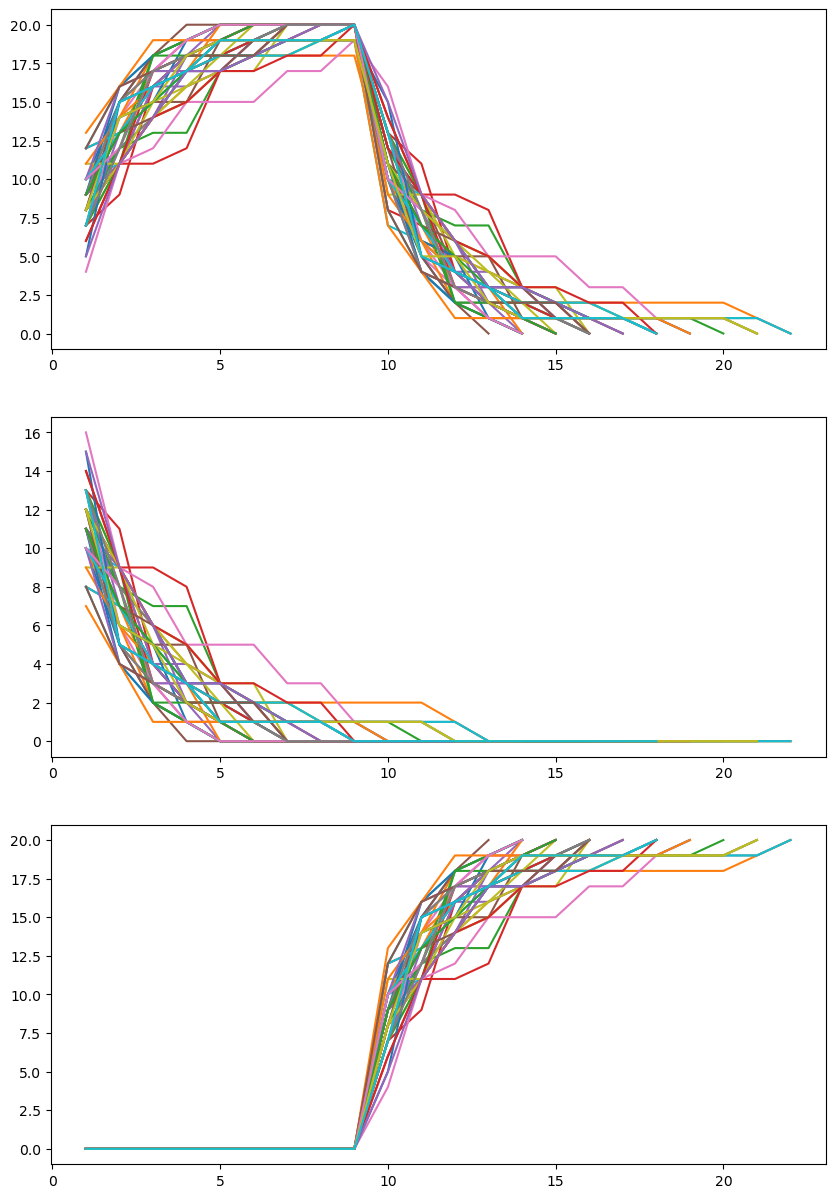

In [67]:
num_simulations = 50
s = (10, 5)

fig, axs = plt.subplots(3, 1, figsize = (10, 15))

for i in range(num_simulations):
    df = one_run()
    days = df.loc[:, 'days'].tolist()
    adop = df.loc[:, 'adop'].tolist()
    unadop = df.loc[:, 'unadop'].tolist()
    bore = df.loc[:, 'bore'].tolist()
    
    axs[0].plot(days, adop)
    axs[1].plot(days, unadop)
    axs[2].plot(days, bore)
    

